<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류**
- 지도학습: 명시적인 정답이(레이블) 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 학습데이터 피처와 레이블 값을(결정,클래스 값) 머신러닝 알고리즘으로 학습 -> 모델 생성 -> 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측

- 알고리즘: 

> 1) 나이브 베이즈: 베이즈 통계와 생성 모델

> 2) 로지스탁 회귀: 독립변수와 종속변수 선형 관계성

> 3) 결정 트리: 데이터 균일도

> 4) 서포트 벡터 머신: 개별 클래스 간 최대 분류 마진 효과적으로 찾아줌

> 5) 최소 근접 알고리즘: 근접 거리 기준으로 하는 최소 근접 알고리즘

> 6) 신경망: 심층 연결 기반

> 7) 앙상블: 서로 다른 또는 같은 머신러닝 알고리즘 결합

**머신러닝 도식화**
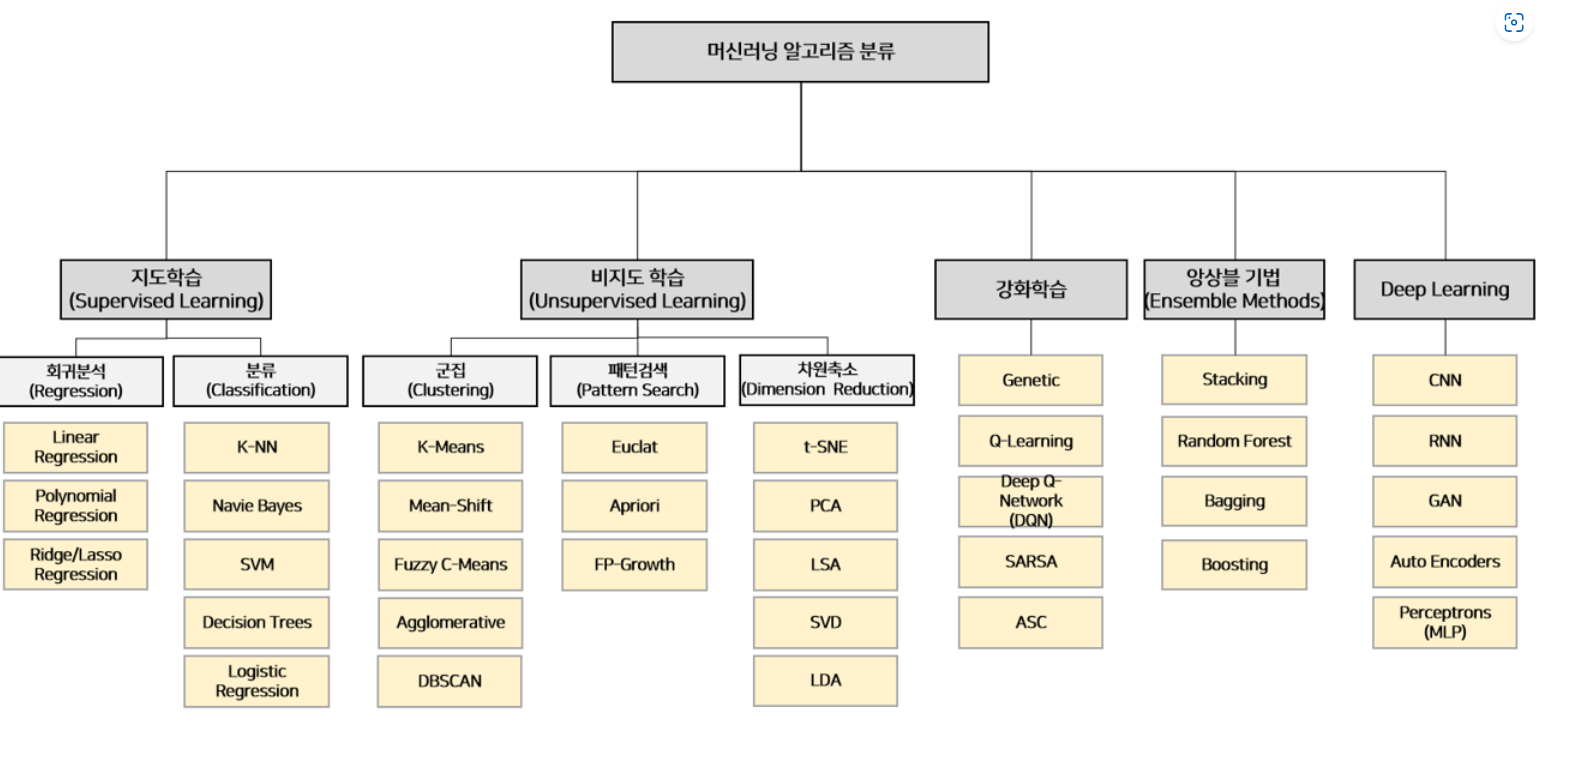


앙상블: 분류 분야에서 각광 받음, 정형 데이터의 예측 분석 영역에서 앙상블은 높은 예측 성능을 가짐. 
> 배깅- 랜덤 포레스트: 뛰어난 예측 성능, 빠른 수행 시간,유연성 

> 부스팅- XgBoost,LightGBM: 수행 시간을 단축시킨 알고리즘 등장 -> 정형 데이터의 분류 영역에서 가장 활용도 높은 알고리즘

> 결론: 서로 다른 또는 같은 알고리즘 결합 대부분은 동일한 알고리즘 결합. 앙상블의 기본 알고리즘은 결정트리임.

<분류>
결정 트리: 
- 쉽고 유연하게 적용 가능
- 데이터의 스케일링이나 정규화 등의 사전 가공 영향 적음.
- 예측 성능 향상 위해 복잡한 규칙 구조 -> 과적합 발생 -> 예측 성능 저하 단점 

But,이러한 단점이 앙상블에서는 오히려 장점, 앙상블은 매우 많은 여러개이 약한 학습기 (예측 성능이 상대적으로 떨어지는 학습 알고리즘을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능 향상) -> **결정트리가 좋은 약한 학습기가 됨.**

#**결정트리**
- 직관적인 이해의 알고리즘
- 데이터의 규칙 학습을 통해 트리 기반의 분류 규칙 만듦
- if/else 기반 *데이터의 어떤 기준의 규칙이 효율적인 분류? -> 알고리즘 성능 좌우
- 규칙노드: 규칙조건이 됨 *피처가 결합해 규칙 조건을 만들때마다 생성
- 리프 노드: 결정된 클래스의 값
- 새로운 규칙 조건마다 서브 트리 생성 
- 많은 규칙:분류의 결정 방식 복잡(과적합)
- 트리의 깊이가 깊을수록 결정 트리의 예측 성능 저하
- 최적의 상태 : 적은 결정 노드로 높은 예측 정확도 -> 데이터 분류 시, 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함.
- 따라서, 트리 분할 방법이 중요함 : 최대한 균일한 데이터 세트를 구성할 수 있도록 분할.

**결정 트리 모델의 시각화**

In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#붓꽃 데이터 세트에 결정 트리 적용할 때 서브 트리의 시각화
from sklearn.tree import DecisionTreeClassifier #사이킷런 임포트
from sklearn.datasets import load_iris #데이터 세트 로딩
from sklearn.model_selection import train_test_split #데이터 분할
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붗꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

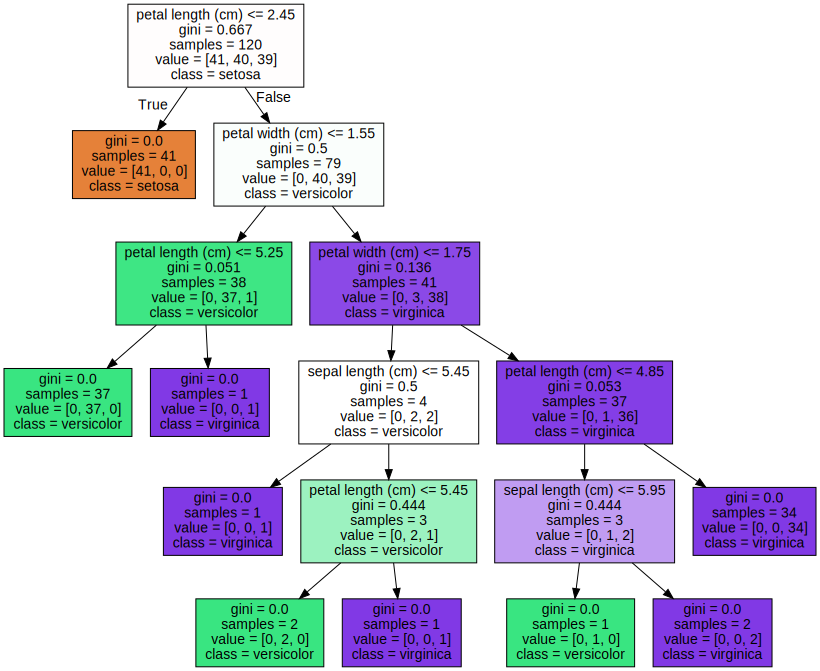

In [ ]:
#시각화
from sklearn.tree import export_graphviz #export_graphviz 읽어들임.
export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,feature_names = iris_data.feature_names,impurity=True,filled=True)
#인자 순:estimator,output 파일 명, 결정 클래스 명칭,피처 명칭 입력

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

출력된 결과: 결정 트리 규칙 구성을 알 수 있음. 각 규칙에 따라 트리의 브랜치 노드와 말단 리프 노드가 어떻게 구성되는지 알 수 있게 시각화 됨.

- 리프 노드:  더 이상 자식 노드가 없음. 최종 클래스(레이블) 값이 결정되는 노드, 오직 하나의 클래스 값으로 최종 데이터 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족.

- 브랜치 노드: 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음.


<노드 내 지표 정리>
1.  규칙 조건: petal length(cm) <= 2.45와 같이 피처의 조건 (자식 노드를 만듦)  
2.  gini : value=[]로 주어진 데이터 분포에서의 지니계수임.
3.  samples는 현 규칙에 해당하는 데이터 건수
4.  value=[]는 클래스 값 기반의 데이터 건수.

**중요도**
값이 높을수록 중요도가 높음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


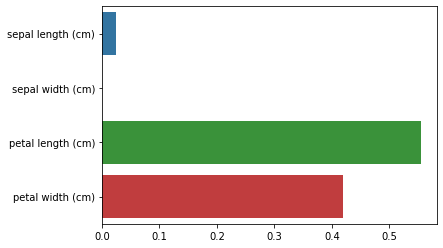

In [ ]:
#붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서 중요도 추출
#fit()으로 학습된 DecisionTreeClassifier 객체 변수인 df_clf에서 feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

petal_length의 피처 중요도가 높음.

# **데이터 과적합** : 결정트리 실습 - 사용자 행동 인식 데이터 세트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv("/features.txt", sep='\s+', header=None, names=['column_index','column_name'])

#피처명 index를 제거하고 피처명을 리스트 형태로 변환 
feature_name = feature_name_df.iloc[:,1].values.tolist()

#피처명 샘플 10개 추출
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **앙상블 학습**

- 개요: 여러개의 분류기를 생성 -> 그 예측 결합 -> 최종 예측 도출 기법
- 정형 데이터 분류의 뛰어난 성능
- XG Boost,Light GBM, 여러가지 모델의 결과를 기반으로 메타 모델을 수립하는 Stacking *최신 앙상블 모델 잘 알고 있어도, 정형 데이터의 분류,회귀에서 예측 성능이 뛰어난 모델 만들 수 있음.
- 유형: 
1&2 : 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정  
1.   보팅(서로 다른 알고리즘 분류기 결합)
2.   배깅(서로 같은 알고리즘 분류기 결합, 데이터 샘플링을 다르게 하여 보팅 수행 cf) 랜덤 포레스트 알고리즘 

     배깅: 데이터 샘플링 추출 방식을 부트스트래핑 분할방식 ->개별적인 예측 수행 결과 -> 보팅 -> 최종 예측 결과 선정 *교차검증은 데이터 세트 간 중첩 허용 하지 않지만, 배깅 방식은 중첩 허용함. (중복된 데이터 존재)
3. 부스팅: 여러 개의 분류기가 순차적으로 학습, 앞 분류기가 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 다음 분류기에 가중치 부여하면서 학습과 예측 진행 *계속해서 분류기에 가중치 부스팅하면서 학습을 진행해서 부스팅 방식으로 불림. cf) 그래디언트 부스트, XG Boost, LightGBM
4. 스태킹: 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과 예측함. 

**보팅 유형**
1.   하드 보팅: 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
2.   소프트 보팅: 분류기의 레이블 값 결정확률을 모두 더하고 이를 평균하여 이들 중 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정

**<실습>**

**보팅 분류기** : 보팅 방식의 앙상블 구현한 VotingClassifier 클래스 제공
- 위스콘신 유방암 데이터 세트:
> 레이블: 악성종양, 양성종양 (이진 분류 데이터 세트)

 > 피처: 종양의 크기,모양 등의 형태

->로지스틱 회귀와 KNN을 기반으로 보팅 분류기 형성.

In [ ]:
#데이터 모듈 임포트 및 데이터 확인
import pandas as pd

from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
#소프트 보팅 방식으로 보팅 분류기 생성
#VotingClassifier 클래스를 이용해 보팅 분류기 생성, 인자로 estimators와 voting 값을 입력받으며, estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음.

#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train) #학습
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:4f}'.format(accuracy_score(y_test,pred)))

#개벽 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.947368
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


결과: 보팅 분류기가 조금 높게 나왔음. 보팅으로 여러개 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지 않음.데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수도 있음.

# **Light GBM 설치**

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

# **위스콘신 유방암 예측**

In [ ]:
#LightGBM의 파이썬 패키지인 lightgb에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data #피처 값
target = dataset.target #레이블 값

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr,target,test_size=0.2, random_state=156)

#앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)] #eval_set의 데이터 성능 평가, eval_metric 성능평가 방법
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,eval_metric = "logloss", eval_set=evals,verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

